In [2]:
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
import ModelFlare as mf

In [3]:
statsfiles = glob.glob('stats/stats*')
gaiafiles = glob.glob('stats/*gaia.csv')

In [4]:
stats = pd.DataFrame()
gaia = pd.DataFrame()

for i in statsfiles:
    df = pd.read_csv(i)
    stats = stats.append(df)

for i in gaiafiles:
    df = pd.read_csv(i)
    gaia = gaia.append(df)

statslim = stats.loc[((stats["chi_flare"] <= 50) & (stats['red_flare'] + .25 < stats['red_gauss']) & 
                      ((stats["ypos"] >= 10) | (stats['ypos'] < 3075)) & 
                      ((stats['end_time'] - stats['flare_time']) > 0.01) &
                      (stats['dof_flare'] > 15))]  

gaialim = gaia.loc[((gaia["chi_flare"].values.astype(np.float) <= 50) & (gaia['red_flare'].values.astype(np.float) + .25 < gaia['red_gauss'].values.astype(np.float)) & 
                    ((gaia["ypos"].values.astype(np.float) >= 10) | (gaia['ypos'].values.astype(np.float) < 3075)) & 
                    ((gaia['end_time'].values.astype(np.float) - gaia['flare_time'].values.astype(np.float)) > 0.01) &
                    (gaia['dof_flare'].values.astype(np.float) > 15)  #everything after this was added
                   )]
colorlim = gaia.loc[(((gaia['phot_g_mean_flux'] / gaia['phot_g_mean_flux_error']) > 50) &
                     ((gaia['phot_rp_mean_flux'] / gaia['phot_rp_mean_flux_error']) > 20) &
                     ((gaia['phot_bp_mean_flux'] / gaia['phot_bp_mean_flux_error']) > 20))]                    


In [5]:
gaialim.columns.values

array(['angDist', 'match_file', 'id', 'aic_flare', 'chi_flare',
       'dof_flare', 'red_flare', 'aic_gauss', 'chi_gauss', 'dof_gauss',
       'red_gauss', 'exp_comp', 'perc_comp', 'fl_indx', 'equivdur', 'ra',
       'dec', 'xpos', 'ypos', 'flare_time', 'end_time', 'flare_end_diff',
       'ra_epoch2000', 'dec_epoch2000', 'errHalfMaj', 'errHalfMin',
       'errPosAng', 'source_id', 'ra.1', 'ra_error', 'dec.1', 'dec_error',
       'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'duplicated_source', 'phot_g_mean_flux',
       'phot_g_mean_flux_error', 'phot_g_mean_mag', 'phot_bp_mean_flux',
       'phot_bp_mean_flux_error', 'phot_bp_mean_mag', 'phot_rp_mean_flux',
       'phot_rp_mean_flux_error', 'phot_rp_mean_mag', 'bp_rp',
       'radial_velocity', 'radial_velocity_error', 'rv_nb_transits',
       'teff_val', 'a_g_val', 'e_bp_min_rp_val', 'radius_val', 'lum_val'],
      dtype=object)

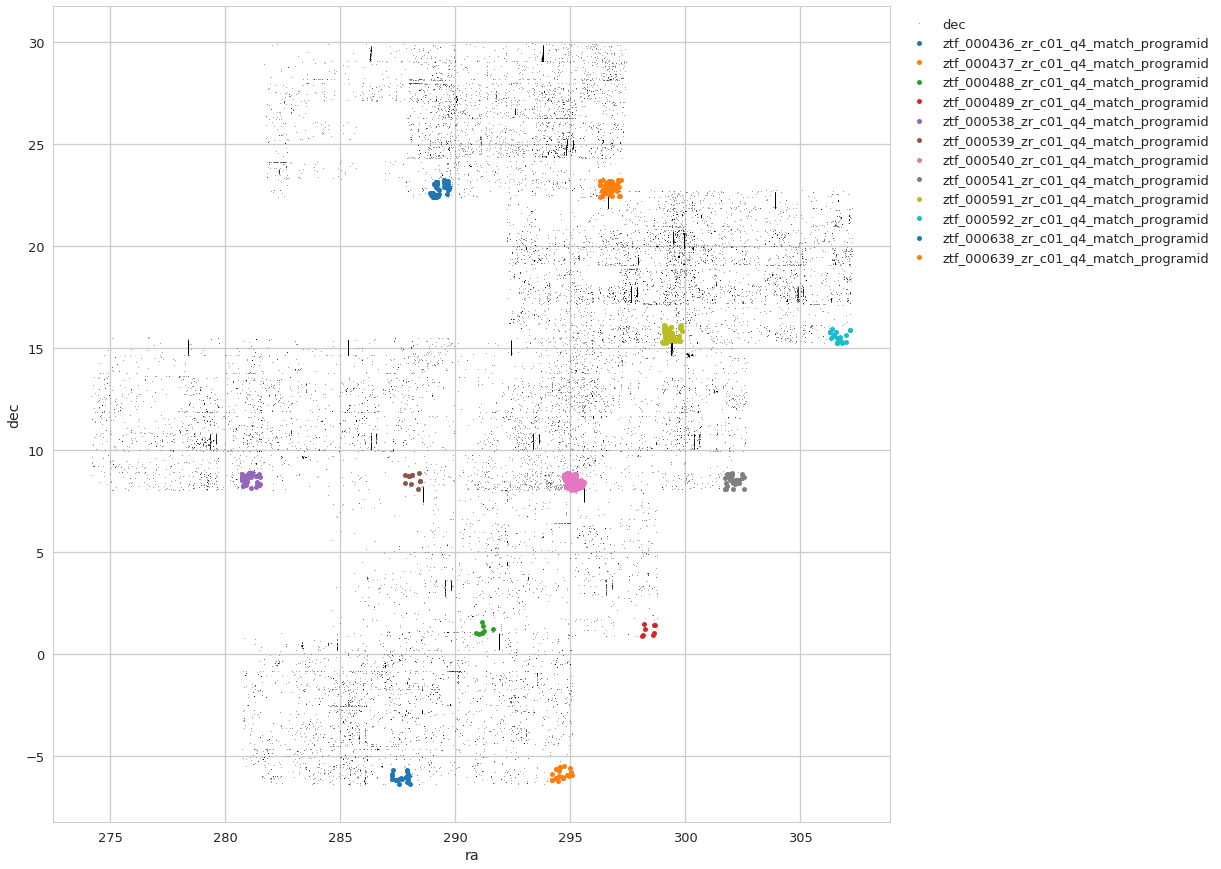

In [6]:
plt.figure(figsize=(15,15))
plt.plot(stats['ra'], stats['dec'], linestyle='none', marker='.', color='black', markersize=1)
plt.xlabel('ra')
plt.ylabel('dec')

fields = ['ztf_000436_zr_c01_q4_match_programid',
         'ztf_000437_zr_c01_q4_match_programid',
         'ztf_000488_zr_c01_q4_match_programid',
         'ztf_000489_zr_c01_q4_match_programid',
         'ztf_000538_zr_c01_q4_match_programid',
         'ztf_000539_zr_c01_q4_match_programid',
         'ztf_000540_zr_c01_q4_match_programid',
         'ztf_000541_zr_c01_q4_match_programid',
         'ztf_000591_zr_c01_q4_match_programid',
         'ztf_000592_zr_c01_q4_match_programid',
         'ztf_000638_zr_c01_q4_match_programid',
         'ztf_000639_zr_c01_q4_match_programid']

for f in fields:
    lim = stats.loc[stats['match_file'] == f]
    plt.plot(lim['ra'], lim['dec'], linestyle='none', marker='.', markersize=10, label=f)
plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))


(287.6, 288.2)

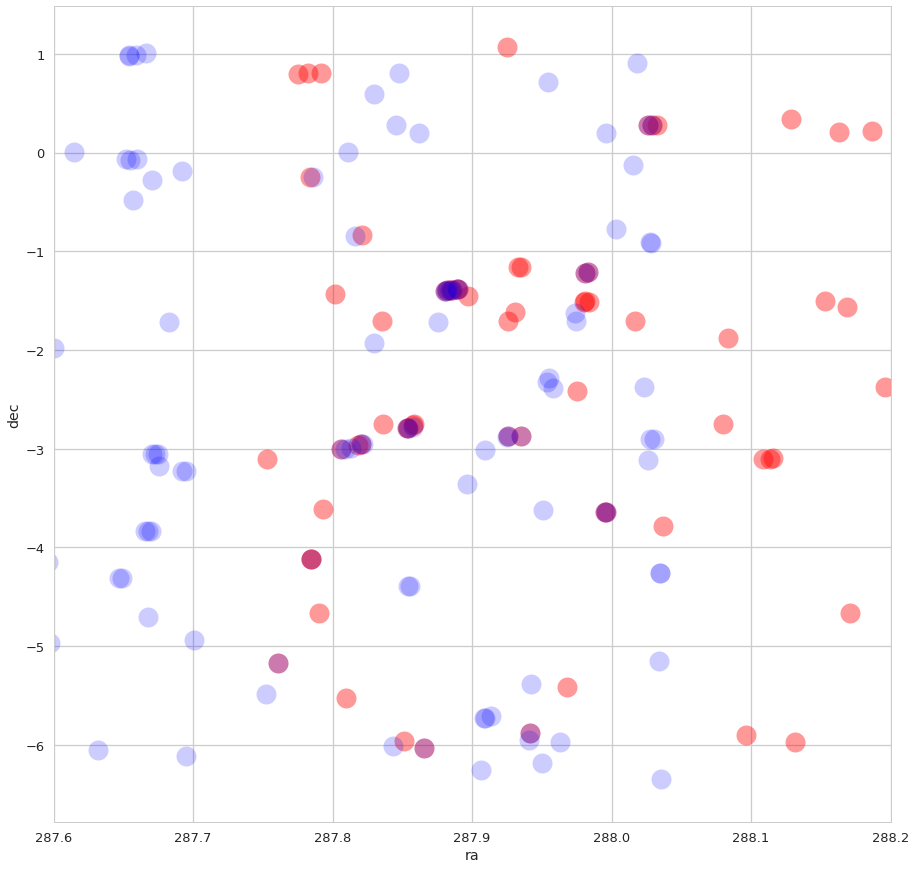

In [7]:
f436 = pd.read_csv('stats/stats_ztf_000436.csv')
f437 = pd.read_csv('stats/stats_ztf_000437.csv')
plt.figure(figsize=(15,15))
plt.plot(f437['ra'], f437['dec'], linestyle='none', marker='.', color='red', alpha=.4, markersize=40)

plt.plot(f436['ra'], f436['dec'], linestyle='none', marker='.', color='blue', alpha=.2, markersize=40)
plt.xlabel('ra')
plt.ylabel('dec')
plt.xlim(287.6, 288.2)

Text(0, 0.5, 'dec')

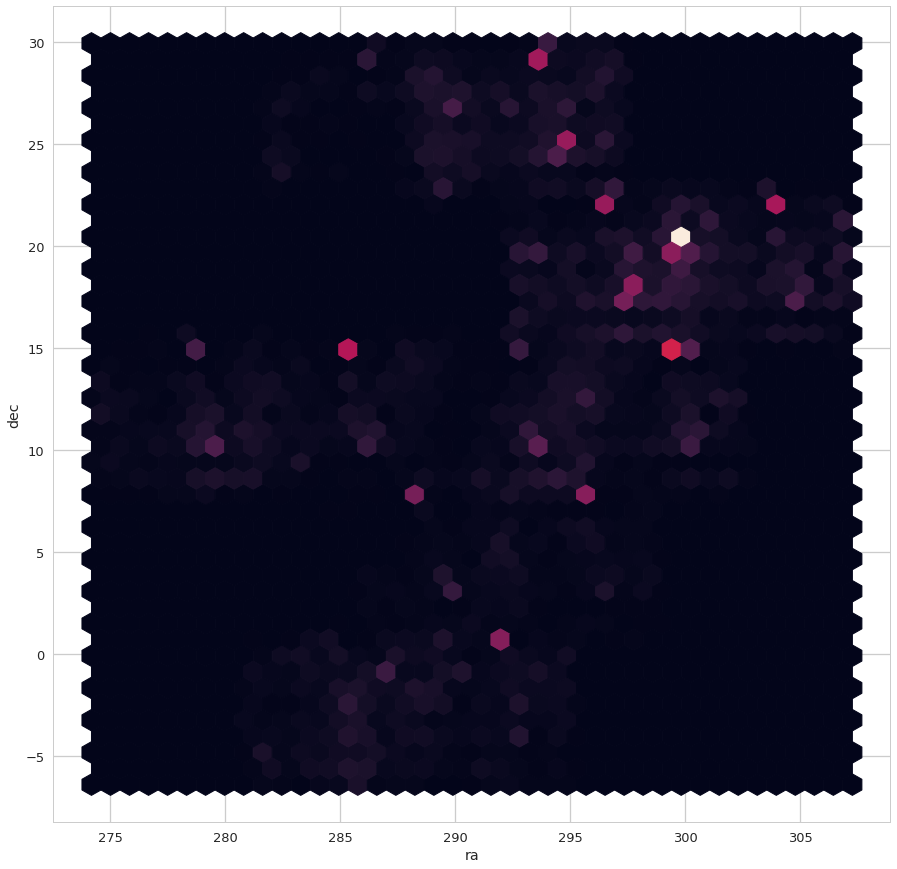

In [8]:
plt.figure(figsize=(15,15))
plt.hexbin(stats['ra'], stats['dec'], gridsize=40)
plt.xlabel('ra')
plt.ylabel('dec')

In [9]:
def veiwlimitedcurves(statscsv, path='found_flares_436/'):
    stats = pd.read_csv(statscsv)
    statslim = stats.loc[((stats["chi_flare"] <= 100) & (stats['red_flare'] + 1 < stats['red_gauss']) & 
                          ((stats["ypos"] >= 10) | (stats['ypos'] < 3075)) & 
                          ((stats['end_time'] - stats['flare_time']) > 0.01) &
                          (stats['dof_flare'] > 15))]  
    for i in range(len(statslim['id'])):
        filepath = path + statslim['match_file'].values[i] + '_id_' + str(statslim['id'].values[i]) + '*.png'
        filepath = glob.glob(filepath)
        for j in filepath:
            display(Image(filename=j))

In [10]:
ok1 = np.where(np.isfinite(gaia[u'parallax']) & 
              (gaia[u'parallax_error'] / gaia[u'parallax'] < 0.02) & np.isfinite(gaia[u'bp_rp']) & 
              (gaia[u'phot_bp_mean_flux_error']/gaia[u'phot_bp_mean_flux'] < 0.05) & 
              (gaia[u'phot_rp_mean_flux_error']/gaia[u'phot_rp_mean_flux'] < 0.05) & 
              (gaia[u'phot_g_mean_flux_error']/gaia[u'phot_g_mean_flux'] < 0.02))[0]

In [11]:
#  MIST isochrones
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = 'MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.))[0][::-1]
                    #&                     (mist['Gaia_G_DR2Rev'] > 2))

In [12]:
def LUM(gflux, plx, zp='AB', mag='G'):
    # from https://www.cosmos.esa.int/web/gaia/iow_20180316
    G0 = 25.7915509947 # AB_ZP mag

    # from Table 5.4: https://gea.esac.esa.int/archive/documentation/GDR2/Data_processing/chap_cu5pho
    #/sec_cu5pho_calibr/ssec_cu5pho_calibr_extern.html
    lp = 623.06 * u.nm # pivot wavelength of G filter

    m_G = -2.5 * np.log10(gflux) + G0
    F_AB_JY = 3631 * 10**(-0.4 * m_G)
    F_AB = F_AB_JY  * 1e-23 * u.erg/u.s/u.cm/u.cm/u.Hz

    dist = (1000./plx) * u.pc
    L = ((F_AB * dist**2) * (const.c/lp).to('Hz')).to(u.erg / u.s)
    return L.value


/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log10


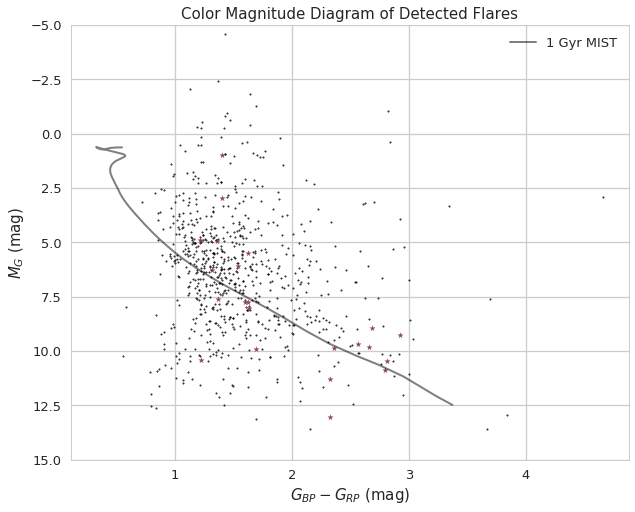

In [13]:
#And then you can call it like this:
LL = LUM(gaia['phot_g_mean_flux'][ok1].values, gaia['parallax'][ok1].values)

#And use it like this:
plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
#plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
#         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
#plt.ylim(15,4.5)



plt.scatter(gaia['bp_rp'][ok1], gaia['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaia[u'parallax'][ok1]) + 5, 
            alpha=0.75, s=10, label=None, marker='.', color='k')

plt.scatter(gaialim['bp_rp'][ok1], gaialim['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaialim[u'parallax'][ok1]) + 5, 
            alpha=0.75, s=30, edgecolors='red', label=None, marker='*')

plt.ylim(15,-5)

plt.legend()

/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


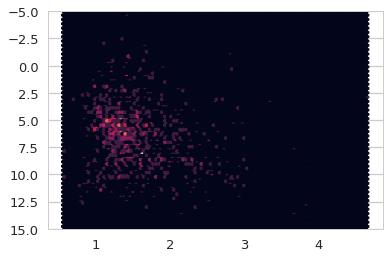

In [14]:
plt.ylim(15,-5)

plt.hexbin(gaia['bp_rp'][ok1], gaia['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaia[u'parallax'][ok1]) + 5)

### Playing with Extinction

Extinction coefficients as seen in: https://www.aanda.org/articles/aa/pdf/2018/08/aa32843-18.pdf
c1 c2 c3 c4 c5 c6 c7
kG 0.9761 −0.1704 0.0086 0.0011 −0.0438 0.0013 0.0099
kBP 1.1517 −0.0871 −0.0333 0.0173 −0.0230 0.0006 0.0043
kRP 0.6104 −0.0170 −0.0026 −0.0017 −0.0078 0.00005 0.0006

kx = Ax / A0
Ax = kx * A0

In [15]:
g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7 = [0.9761, -0.1704, 0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7 = [1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7 = [0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]


In [28]:
def extinction_coef(GBP, GRP, A0, c1, c2, c3, c4, c5, c6, c7):
    k = (c1 + c2*(GBP - GRP) + c3*(GBP - GRP)**2 + c4*(GBP - GRP)**3
         + c5*A0 + c6*A0**2 + c7*(GBP - GRP)*A0)
    return k

In [67]:
def cmd_mags(df):
    g_mag = []
    bp_rp_mag = []
    
    g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7 = [0.9761, -0.1704, 0.0086, 0.0011, -0.0438, 0.0013, 0.0099]
    bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7 = [1.1517, -0.0871, -0.0333, 0.0173, -0.0230, 0.0006, 0.0043]
    rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7 = [0.6104, -0.0170, -0.0026, -0.0017, -0.0078, 0.00005, 0.0006]
    
    for index, row in df.iterrows():
        k_g = extinction_coef(row['phot_bp_mean_mag'],row['phot_rp_mean_mag'],row['a_g_val'],g_c1,g_c2,g_c3,g_c4,g_c5,g_c6,g_c7)
        A_g = k_g * row['a_g_val']
        k_bp = extinction_coef(row['phot_bp_mean_mag'],row['phot_rp_mean_mag'],row['a_g_val'],bp_c1,bp_c2,bp_c3,bp_c4,bp_c5,bp_c6,bp_c7)
        A_bp = k_bp * row['a_g_val']
        k_rp = extinction_coef(row['phot_bp_mean_mag'],row['phot_rp_mean_mag'],row['a_g_val'],rp_c1,rp_c2,rp_c3,rp_c4,rp_c5,rp_c6,rp_c7)
        A_rp = k_rp * row['a_g_val']
        
        g_mag_value = row['phot_g_mean_mag'] - 5. * np.log10(1000./row[u'parallax']) + 5 - A_g
        g_mag.append(g_mag_value)
        bp_mag_value = row['phot_bp_mean_mag'] - 5. * np.log10(1000./row[u'parallax']) + 5 - A_bp
        rp_mag_value = row['phot_rp_mean_mag'] - 5. * np.log10(1000./row[u'parallax']) + 5 - A_rp
        bp_rp_mag_value = bp_mag_value - rp_mag_value
        bp_rp_mag.append(bp_rp_mag_value)
        
    return g_mag, bp_rp_mag
        
    

In [96]:
gaia_ext = gaia.loc[(gaia['a_g_val'] > 0) &
                    np.isfinite(gaia[u'parallax']) &
                    (gaia[u'phot_bp_mean_flux_error']/gaia[u'phot_bp_mean_flux'] < 0.05) &
                    (gaia[u'phot_rp_mean_flux_error']/gaia[u'phot_rp_mean_flux'] < 0.05) &
                    (gaia[u'phot_g_mean_flux_error']/gaia[u'phot_g_mean_flux'] < 0.02) &
                    (gaia[u'parallax_error'] / gaia[u'parallax'] < .5)]

In [97]:
g_mag, bp_rp_mag = cmd_mags(gaia_ext)

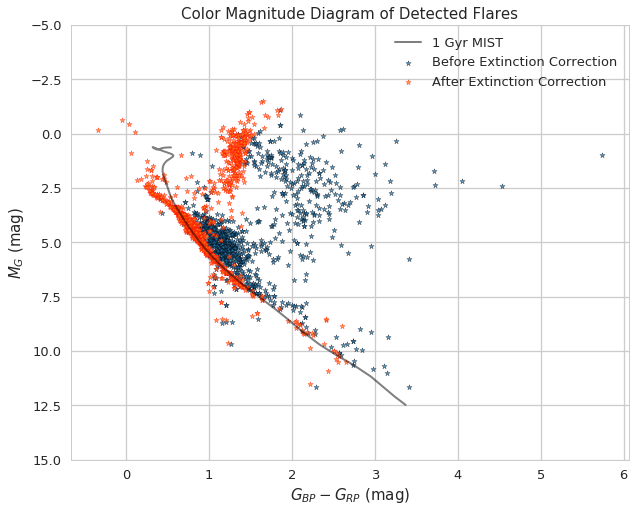

In [98]:
#And then you can call it like this:
LL = LUM(gaia_ext['phot_g_mean_flux'].values, gaia_ext['parallax'].values)

#And use it like this:
fig = plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
#plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
#         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
#plt.ylim(15,4.5)


plt.scatter(gaia_ext['bp_rp'], gaia_ext['phot_g_mean_mag'] - 5. * np.log10(1000./gaia_ext[u'parallax']) + 5, 
            alpha=0.75, s=30, edgecolors='black', label='Before Extinction Correction', marker='*')
plt.scatter(bp_rp_mag, g_mag, alpha=0.75, s=30, edgecolors='red',
            label='After Extinction Correction', marker='*')


plt.ylim(15,-5)
plt.legend()
#fig.savefig('CMD_extinction_correction.png')

## Full Gaia

In [29]:
#Reading in 
df_xmatch436 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_436.h5','table')
df_xmatch437 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_437.h5','table')
df_xmatch488 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_488.h5','table')
df_xmatch489 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_489.h5','table')
df_xmatch538 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_538.h5','table')
df_xmatch539 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_539.h5','table')
df_xmatch540 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_540.h5','table')
df_xmatch541 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_541.h5','table')
df_xmatch591 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_591.h5','table')
df_xmatch592 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_592.h5','table')
df_xmatch638 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_638.h5','table')
df_xmatch639 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_639.h5','table')
df_xmatch685 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_685.h5','table')
df_xmatch686 = pd.read_hdf('../epyc/users/ecbellm/stellar_flares/gaia_match/gaia_match_686.h5','table')

In [30]:
xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

In [31]:
df_xmatch = pd.DataFrame()
for i in xmatch:
    df_xmatch = df_xmatch.append(i)

In [32]:
df_xmatch.dtypes

matchid                             int64
ra                                float64
dec                               float64
source_id                           int64
bp_rp                             float64
phot_g_mean_mag                   float64
phot_g_mean_flux_over_error       float64
parallax                          float64
parallax_error                    float64
axsdist                           float64
exploded_unique_matchids_index      int64
unique_matchids_exploded          float64
dtype: object

In [33]:
df_xmatch['unique_matchids_exploded'] = df_xmatch['unique_matchids_exploded'].astype(int)

In [45]:
df_full = df_xmatch.loc[(df_xmatch['exploded_unique_matchids_index'] == 0) &
                        np.isfinite(df_full[u'parallax']) & 
                        (df_full[u'parallax_error'] / df_full[u'parallax'] < 0.02) & 
                        np.isfinite(df_full[u'bp_rp']) & 
                        (df_full[u'phot_g_mean_flux_over_error'] > 50)]

KeyboardInterrupt: 

In [39]:
ok_full = np.where(np.isfinite(df_full[u'parallax']) & 
                   (df_full[u'parallax_error'] / df_full[u'parallax'] < 0.02) & np.isfinite(df_full[u'bp_rp']) & 
                   (df_full[u'phot_g_mean_flux_over_error'] > 50))[0] 

In [43]:
df_full.loc[df_full[u'phot_g_mean_flux_over_error'] > 50]

,matchid,ra,dec,source_id,bp_rp,phot_g_mean_mag,phot_g_mean_flux_over_error,parallax,parallax_error,axsdist,exploded_unique_matchids_index,unique_matchids_exploded
0,436122210002755,280.733874,-1.647091,4259944895726304256,2.711182,19.795309,152.442886,1.663635,0.501806,8.523954e-07,0,436122210002755
1,436122210001820,280.733946,-1.638059,4259944895725214976,2.762857,20.059027,88.366631,2.674194,0.929784,1.388707e-06,0,436122210001820
2,436122210000475,280.734618,-1.643361,4259944895724327552,1.996664,17.910002,524.161926,0.504240,0.138655,2.681570e-07,0,436122210000475
3,436122210013655,280.734624,-1.639344,4259944900021713792,2.410799,20.645643,87.630966,0.891499,1.013705,5.523244e-07,0,436122210013655
4,436122210004712,280.735405,-1.649468,4259944831302182528,2.478540,19.771769,145.326172,0.610965,0.544387,3.372558e-07,0,436122210004712
6,436122210098665,280.735450,-1.640248,4259944900021706368,2.729658,20.190050,110.393127,1.261092,0.687071,3.118348e-06,0,436122210083129
8,436122210003353,280.736315,-1.646754,4259944900021671552,1.746391,19.779970,157.726730,0.514437,0.541917,4.936904e-07,0,436123210020352
11,436123210017950,280.736521,-1.640033,4259944900029527680,3.007269,16.502338,866.481750,0.303958,0.086633,3.793325e-07,0,436122200090705
13,436123210017241,280.736795,-1.647066,4259944895726311168,3.488903,18.553970,334.352142,0.325984,0.272450,7.677514e-07,0,436123210017241
15,436122200106893,280.736981,-1.645829,4259944895729914240,3.453453,18.853180,254.587051,0.116429,0.347367,7.384404e-07,0,436122200106893


/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


KeyboardInterrupt: 

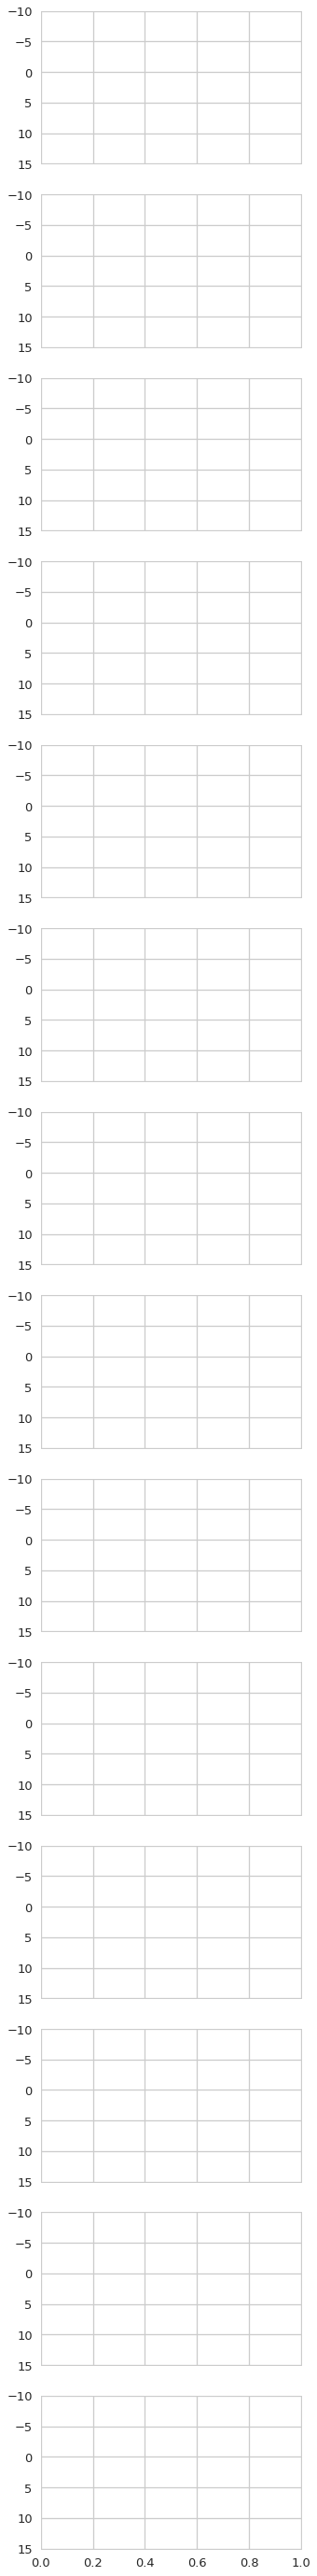

In [41]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(14, sharex=True, sharey=True, figsize=(5, 50))

axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12, ax13, ax14]

xmatch_label = ['436', '437', '488', '489', '538', '539', '540', 
                '541', '591', '592', '638', '639', '685', '686']

xmatch = [df_xmatch436, df_xmatch437, df_xmatch488, df_xmatch489, df_xmatch538, df_xmatch539, df_xmatch540, 
          df_xmatch541, df_xmatch591, df_xmatch592, df_xmatch638, df_xmatch639, df_xmatch685, df_xmatch686]

for x,label,ax in zip(xmatch, xmatch_label,axes):
    LL = LUM(x['phot_g_mean_mag'][ok_full].values, x['parallax'][ok_full].values)
    ax.set_ylim(15,-10)
    ax.scatter(x['bp_rp'][ok_full], x['phot_g_mean_mag'][ok_full] - 5. * np.log10(1000./x[u'parallax'][ok_full]) + 5, 
                alpha=0.1, s=10, label=label)
    ax.scatter(gaialim['bp_rp'][ok_full], gaialim['phot_g_mean_mag'][ok_full] - 5. * np.log10(1000./gaialim[u'parallax'][ok_full]) + 5, 
               alpha=1, s=30, edgecolors='black', label='Flares', marker='*')
    ax.legend()



/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

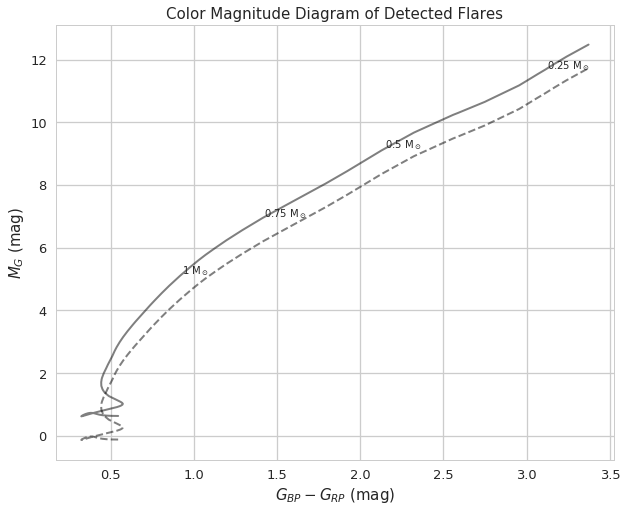

In [42]:
# Compare to CMD Fig 1. https://arxiv.org/pdf/1804.09378.pdf

#And then you can call it like this:
LL = LUM(df_xmatch['phot_g_mean_mag'][ok_full].values, df_xmatch['parallax'][ok_full].values)

#And use it like this:
plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
plt.text(0.93, 5.18, '1 M$_\odot$', fontsize=10)
plt.text(1.42, 6.98, '0.75 M$_\odot$', fontsize=10)
plt.text(2.15, 9.18, '0.5 M$_\odot$', fontsize=10)
plt.text(3.12, 11.7, '0.25 M$_\odot$', fontsize=10)


plt.scatter(ok_full['bp_rp'][ok_full], ok_full['phot_g_mean_mag'][ok_full] + 5. * np.log10(ok_full[u'parallax'][ok_full]/1000.) + 5, 
            alpha=0.1, s=10, color='black', label='All')

#plt.scatter(gaia['bp_rp'][ok_full], gaia['phot_g_mean_mag'][ok_full] - 5. * np.log10(1000./gaia[u'parallax'][ok_full]) + 5, 
#            alpha=0.25, s=10, label='Detections', color='blue')

#plt.scatter(gaialim['bp_rp'][ok_full], gaialim['phot_g_mean_mag'][ok_full] - 5. * np.log10(1000./gaialim[u'parallax'][ok_full]) + 5, 
#            alpha=1, s=200, edgecolors='black',color='red', label='Flares', marker='*')

plt.ylim(15,-5)

plt.legend()

/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in log10
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in log10


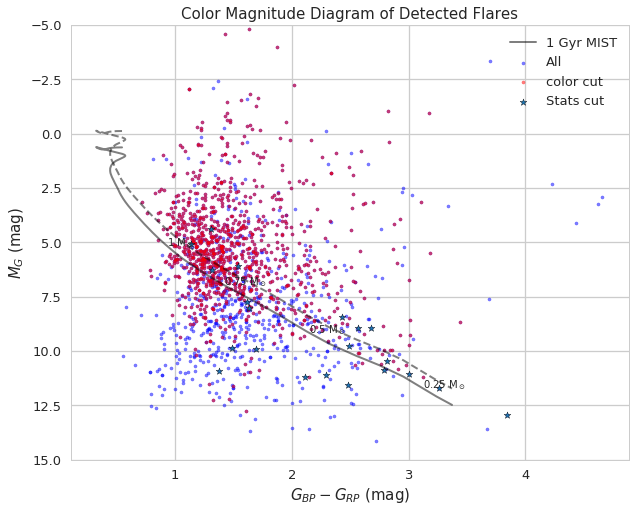

In [87]:
# Compare to CMD Fig 1. https://arxiv.org/pdf/1804.09378.pdf

#And then you can call it like this:
LL = LUM(df_xmatch['phot_g_mean_mag'][ok_all].values, df_xmatch['parallax'][ok_all].values)

#And use it like this:
plt.figure(figsize=(10,8))
plt.xlabel('$G_{BP} - G_{RP}$ (mag)', size=15)
plt.title('Color Magnitude Diagram of Detected Flares', size=15)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1] - 0.7526, c='k', lw=2, alpha=0.5, linestyle='--')
plt.ylabel('$M_G$ (mag)', size=15)
plt.text(0.93, 5.18, '1 M$_\odot$', fontsize=10)
plt.text(1.42, 6.98, '0.75 M$_\odot$', fontsize=10)
plt.text(2.15, 9.18, '0.5 M$_\odot$', fontsize=10)
plt.text(3.12, 11.7, '0.25 M$_\odot$', fontsize=10)


plt.scatter(gaia['bp_rp'][ok_all], gaia['phot_g_mean_mag'][ok_all] + 5. * np.log10(gaia[u'parallax'][ok_all]/1000.) + 5, 
            alpha=0.5, s=10, color='blue', label='All')

plt.scatter(colorlim['bp_rp'][ok_all], colorlim['phot_g_mean_mag'][ok_all] - 5. * np.log10(1000./colorlim[u'parallax'][ok_all]) + 5, 
            alpha=0.5, s=10, label='color cut', color='red')

plt.scatter(gaialim['bp_rp'][ok_all], gaialim['phot_g_mean_mag'][ok_all] - 5. * np.log10(1000./gaialim[u'parallax'][ok_all]) + 5, 
            alpha=1, s=50, edgecolors='black', label='Stats cut', marker='*')

plt.ylim(15,-5)

plt.legend()

/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


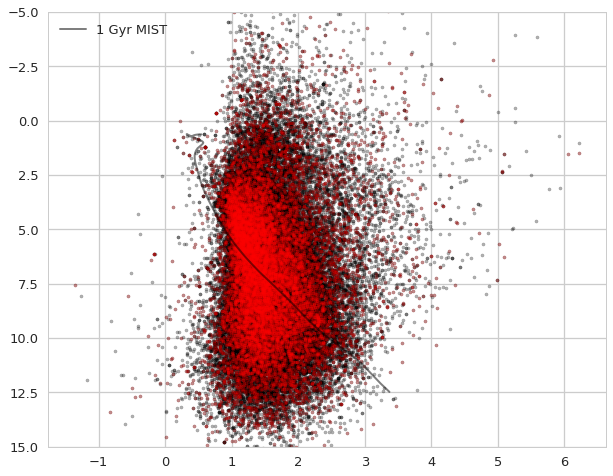

In [111]:
ok2 = np.where(np.isfinite(gaia[u'parallax']) & 
               (gaia[u'parallax_error'] / gaia[u'parallax'] < 0.2) & np.isfinite(gaia[u'bp_rp']) & 
               (gaia[u'phot_bp_mean_flux_error']/gaia[u'phot_bp_mean_flux'] < 0.2) & 
               (gaia[u'phot_rp_mean_flux_error']/gaia[u'phot_rp_mean_flux'] < 0.2) & 
               (gaia[u'phot_g_mean_flux_error']/gaia[u'phot_g_mean_flux'] < 0.2))[0]
plt.figure(figsize=(10,8))

plt.ylim(15,-5)


plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], c='k', lw=2, alpha=0.5, label = '1 Gyr MIST')
plt.scatter(df_xmatch['bp_rp'][ok2], df_xmatch['phot_g_mean_mag'][ok2] + 5. * np.log10(df_xmatch[u'parallax'][ok2]/1000.) + 5,
            s=10, color='black', alpha=.3)
plt.scatter(df_xmatch['bp_rp'][ok1], df_xmatch['phot_g_mean_mag'][ok1] + 5. * np.log10(df_xmatch[u'parallax'][ok1]/1000.) + 5,
            s=10, color='red', alpha=.2)

plt.legend()

/epyc/opt/anaconda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
/epyc/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


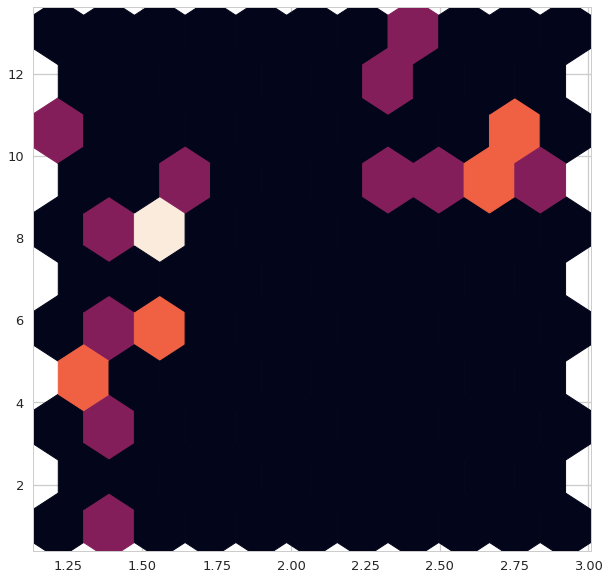

In [113]:
plt.figure(figsize=(10,10))
plt.hexbin(gaialim['bp_rp'][ok1], gaialim['phot_g_mean_mag'][ok1] - 5. * np.log10(1000./gaialim[u'parallax'][ok1]) + 5,
          gridsize = 10)


In [22]:
#ids with multiple gaia:
ids = [319,980,1075, 1221,1806,12125,16088,18773,20074,25692,35014,62107,63050,92591,99664,114607,130076,171211]

id_test = 171211

gaia_info = gaia.loc[(gaia['match_file'] == 'ztf_000639_zr_c14_q2_match_programid') &
                     (gaia['id'] == id_test)]

lc = sourcedata[sourcedata["matchid"] == id_test]


NameError: name 'sourcedata' is not defined

In [ ]:
def test_gaia(gaia,ztf): 
    '''
    If mag > 0 it favors 1, if mag < 0 it favors 0
    If dist > 0 it favors 1, if dist < 0 it favors 0
    '''
    mag = gaia['phot_g_mean_mag'] - np.mean(ztf['psfmag'])
    dist0 = ((gaia['ra_epoch2000'].values[0] - np.mean(ztf['ra'])) ** 2 +
             (gaia['dec_epoch2000'].values[0] - np.mean(ztf['dec'])) ** 2 ) ** .5 
    dist1 = ((gaia['ra_epoch2000'].values[1] - np.mean(ztf['ra'])) ** 2 +
             (gaia['dec_epoch2000'].values[1] - np.mean(ztf['dec'])) ** 2 ) ** .5 
    return [np.abs(mag.values[0]) - np.abs(mag.values[1]), dist0 - dist1]


In [ ]:
for i in ids:
    gaia_info = gaia.loc[(gaia['match_file'] == 'ztf_000639_zr_c14_q2_match_programid') &
                         (gaia['id'] == i)]
    lc = sourcedata[sourcedata["matchid"] == i]
    plt.scatter(test_gaia(gaia_info, lc)[0],test_gaia(gaia_info, lc)[1])
plt.xlabel('Mag difference')
plt.ylabel('Dist difference')

plt.ylim(-.0003, .0003)

### Graph Explaination:
When cross matching ZTF and Gaia, more than one Gaia can be within 1 acrsec of the ZTF source. This graph shows if there is any difference between using proximity or luminosity to determine which Gaia source matches the ZTF source. Being negative in either distance or magnitude shows it favors source 1, being positive in either shows it favors source 2. It tends to prefer the same source using a both comparisons. To ensure there is a one to one match of Gaia to ZTF sources, we had AXS chose the source that was closest. Using proximity was much simpliar to use than their luminosity.

In [114]:
len(df_xmatch)
df_xmatch_0 = df_xmatch.loc[df_xmatch['exploded_unique_matchids_index']==0]

In [ ]:
print(len(df_xmatch), len(df_xmatch_0))

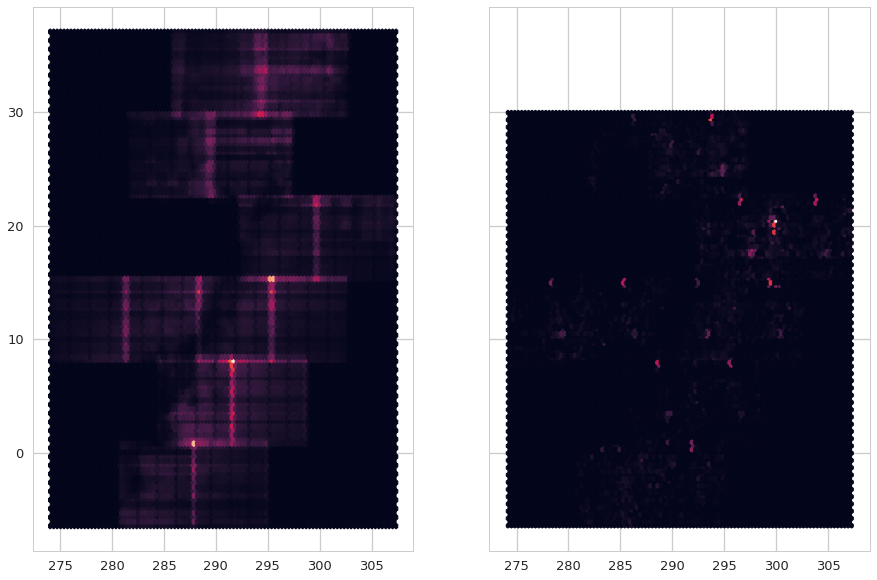

In [25]:
f, (ax1, ax2) = plt.subplots(1,2, sharex=True,sharey=True, figsize=(15, 10))

ax1.hexbin(df_xmatch['ra'],df_xmatch['dec'])

ax2.hexbin(stats['ra'],stats['dec'])


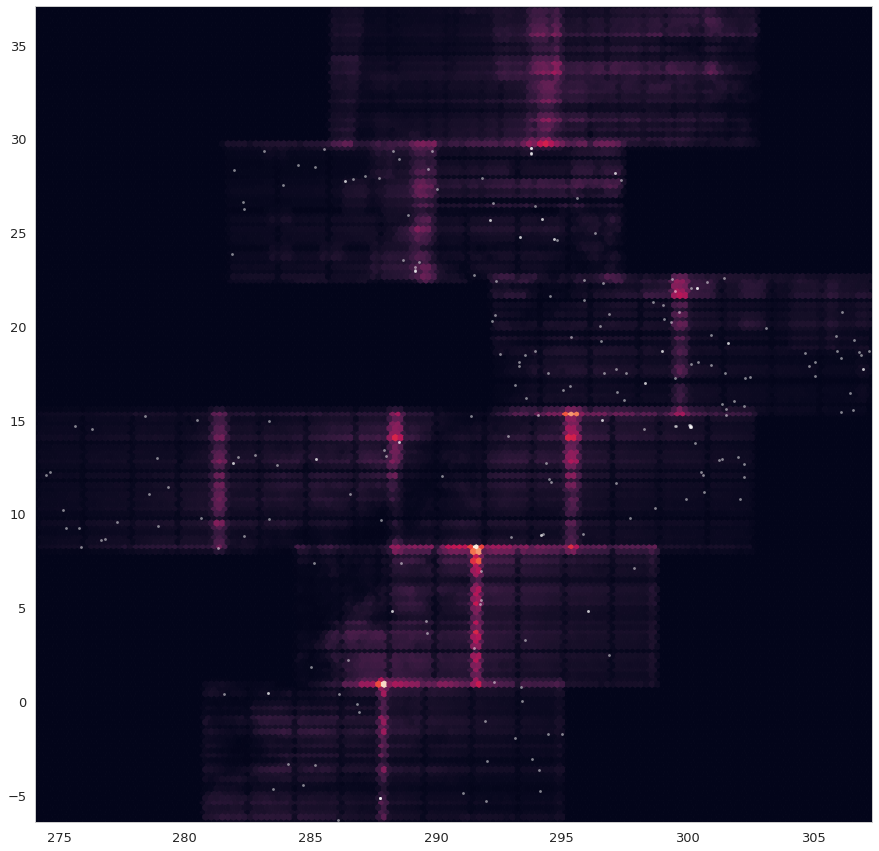

In [45]:
plt.figure(figsize = (15,15))

plt.hexbin(df_xmatch['ra'],df_xmatch['dec'], gridsize=150)

plt.scatter(gaialim['ra'],gaialim['dec'], marker='.', alpha=.5, s=20,c='white')


compare flare rate by spectral type (flaring vs. non-flaring) by binning Gaia CMD
make the flare frequency diagram for same
extrapolate to ZTF sparse survey--given the duty cycle, how often do we expect delta mag flares to appear in e.g. alerts?
[Eric wonders about age-activity relationships, but Jim thinks these are not super informative, and this is hard]


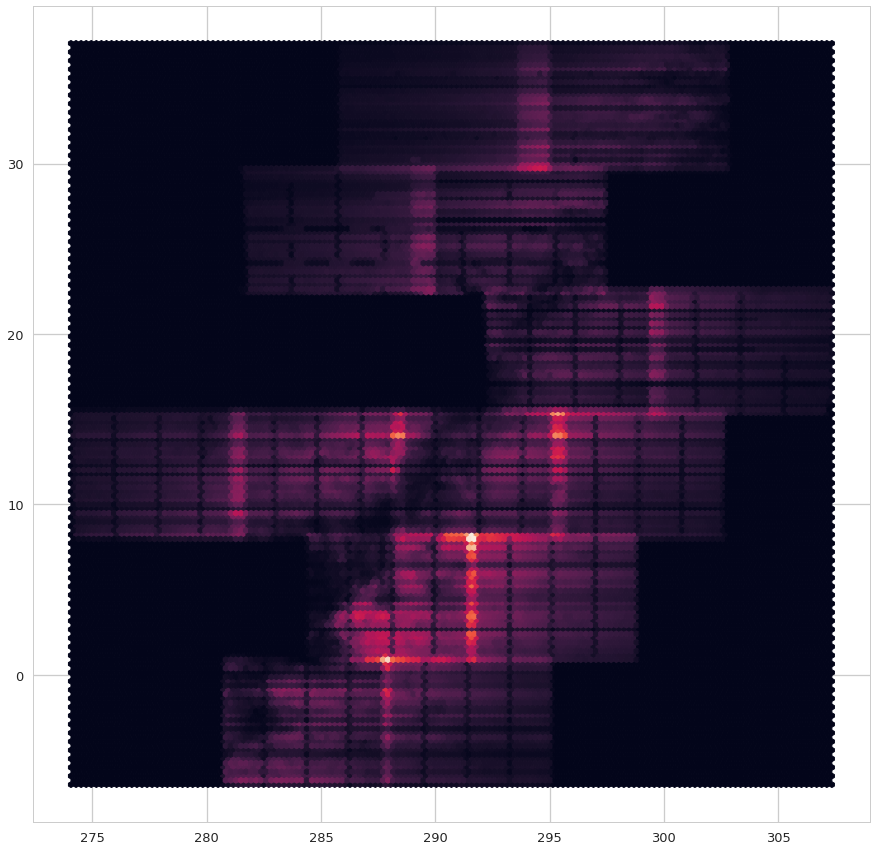

In [120]:
plt.figure(figsize = (15,15))

plt.hexbin(df_xmatch_0['ra'],df_xmatch_0['dec'], gridsize=150)

